# TP2 : Linear regression
## Parameters  estimation by least square

### Datas : Cholesterol $(y_i)_{i=1,\ldots,n}$ level versus ages variable $(x)_{i=1,\ldots,n}$

### Assumptions
We suppose that for $i=1,\ldots,n$
$$Y_i=\beta_0+\beta_1 x+\varepsilon_i$$

with
- $E(\varepsilon_i)=0$
- The $(\varepsilon_i)_{i=1,\dots,n}$ are i.i.d.
- The distributions of $(\varepsilon_i)_{i=1,\dots,n}$ are $\mathcal{N}(0,\sigma^2)$

### Mean square estimations

We use the mean square estimation of the parameters $\beta_0$ and $\beta_1$: 

\begin{array}{ll}
Min\quad
f(\beta)=\frac{1}{2}\sum_{i=1}^{n}r_{i}^{2}(\beta)& =\frac{1}{2}\|r(\beta)\|^2\\
\beta \in \mathbf{R}^{2}&
\end{array}

where $r$ is the residual function
$$r:\mathbf{R}^2\rightarrow \mathbf{R}^n$$
$$r_i(\beta) =  y_i - \beta_{0}+\beta_{1}x_{i}$$

So we can write
$$r(\beta) = y - X\beta,$$
where

$$y = \begin{pmatrix} y_1\\ \vdots \\ y_n\end{pmatrix}\;\,\texttt{and}\;\;
 X = \begin{pmatrix} 1 & x_1\\ \vdots & \vdots \\ 1 & x_n\end{pmatrix}$$



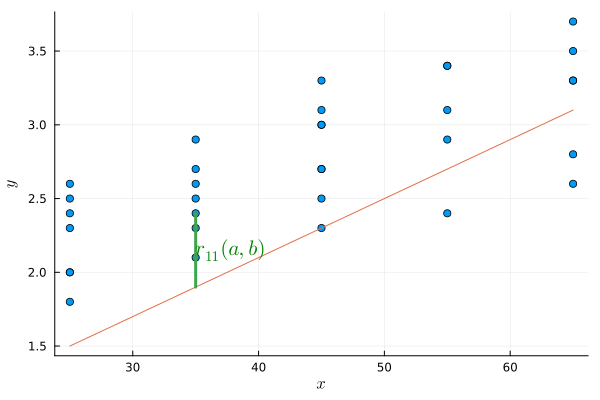

In [12]:
using Test 
using DataFrames
using Plots
using LaTeXStrings
using Statistics
using DataFrames
using GLM

y=[1.8, 2.3, 2, 2.4, 2, 2.5, 2.6, 2.6, 2.9, 2.3, 2.4, 2.1, 2.5, 2.7, 2.7, 3, 3.1, 2.3, 2.5, 3, 3.3, 2.7, 3.1, 2.9, 3.4, 2.4, 3.4, 3.7, 2.8, 3.3, 3.5, 3.3, 2.6]
x=[25, 25, 25, 25, 25, 25, 25, 35, 35, 35, 35, 35, 35, 35, 45, 45, 45, 45, 45, 45, 45, 45, 55, 55, 55, 55, 55, 65, 65, 65, 65, 65, 65]
n = length(x)

p = plot(x,y, seriestype = :scatter, xlabel = (L"x"), ylabel = (L"y"))
a , b = .5 , 0.04
plot!(p,x,a .+ b*x)

r(a,b) = y - (a .+ b*x)

r(a,b)

i = 11
plot!(p, [x[i],x[i]], [y[i],a+b*x[i]],linewidth=3)
annotate!(p,x[i],mean([y[i],a+b*x[i]]),text(L"r_{11}(a,b)", :left, :green))
plot(p,legend=false)

### Exercise

For solving the optimization problem we have to sole the linear system $X^TX\beta = X^Ty$

Use the \ operator for solving linear equation

In [15]:
# 
# Use of the GLM Package
datas = DataFrame(age=x, chol = y)
lm1 = lm(@formula(chol ~ age), datas)
println(coef(lm1))
println(lm1)

# ... To complete and modify

X = [ones(n) x]

βhat = [0., 0.]
βhat₀ = βhat[1]
βhat₁ = βhat[2]
p = plot(x,y, seriestype = :scatter, xlabel = (L"x"), ylabel = (L"y"))
plot!(p,x,βhat₀ .+ βhat₁*x)

println(@test βhat ≈ coef(lm1))

[1.639575381679391, 0.024909351145038124]
StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

chol ~ 1 + age

Coefficients:
────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error     t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  1.63958    0.189994    8.63    <1e-09  1.25208    2.02707
age          0.0249094  0.00413632  6.02    <1e-05  0.0164733  0.0333454
────────────────────────────────────────────────────────────────────────
Test Failed at /Users/gergaud/git-ENS/Julia-TSE/etudiants/M2/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X15sZmlsZQ==.jl:18
  Expression: βhat ≈ coef(lm1)
   Evaluated: [0.0, 0.0] ≈ [1.639575381679391, 0.024909351145038124]



Test.FallbackTestSetException: Test.FallbackTestSetException("There was an error during testing")

### Confidence intervals of the parameters

- We note $r_i = y_i - (\hat{\beta}_0 + \hat{\beta}_1x_i)$, then the unbiased estimation of the variance $\sigma^2$ is

$$\hat{\sigma}^2\frac{\sum_ir_i^2}{n-2}$$

- As $\hat{\beta} = (X^TX)^{-1}X^Ty$ the statistic $B=(X^TX)^{-1}X^TY = (X^TX)^{-1}X^T(X\beta+\varepsilon)=\beta +(X^TX)^{-1}X^T\varepsilon$ as the $\mathcal{N}(\beta,\sigma^2(X^TX)^{-1})$ distribution. 

Si les postulats sont vérifiés alors les
intervalles de confiances de $\beta _{0},\beta _{1}$ et $\sigma ^{2}$ au
seuil $(1-\alpha )$ sont:


- 
$$
\sigma ^{2}\in \left[ \frac{\sum_{i=1}^{n}r_{i}^{2}}{\chi _{1-\alpha /2}};%
\frac{\sum_{i=1}^{n}r_{i}^{2}}{\chi _{\alpha /2}}\right] 
$$

where $\chi _{1-\alpha /2}$ and $\chi _{\alpha /2}$ sont lues
dans le table du Khi-2 à $\nu =n-2$ ddl.

\item  
$$
\begin{array}{ccc}
\beta _{1} & \in  & [\hat{\beta}_{1}-t_{1-\alpha /2}\hat{\sigma}%
_{B_{1}}^{{}};\hat{\beta}_{1}+t_{1-\alpha /2}\hat{\sigma}_{B_{1}}^{{}}] \\ 
\beta _{0} & \in  & [\hat{\beta}_{0}-t_{1-\alpha /2}\hat{\sigma}%
_{B_{0}}^{{}};\hat{\beta}_{0}+t_{1-\alpha /2}\hat{\sigma}_{B_{0}}^{{}}]
\end{array}
$$

où 
- $\hat{\sigma}_{B_{1}}^{2} = \dfrac{\hat{\sigma}^{2}}{SCE_{x}} $
- $\hat{\sigma}_{B_{0}}^{2} = \hat{\sigma}^{2}(\dfrac{1}{n}+\dfrac{\bar{x}^{2}}{SCE_{x}})$
- $t_{1-\alpha /2}$ from the Student law with $n-2$ degrees of  freedom




### Exercise
1. Compute the $n$ residuals in the vector res
2. Compute the estimation of residual variance $\sigma^2$ and of the standard error $\sigma$
3. Compute the estimation of the variance, covariance matrix $\Sigma$.
4. Compute the estimation of the standard error of $\hat{\beta}_0$ and $\hat{\beta}_1$.
5. Compute the confidence intervalle of $\beta_0$ and $\beta_1$


In [17]:
 # Residue
 # To modify
res = zeros(size(x))           
println("Test residuals : ",@test res ≈ residuals(lm1))

# estimation of σ²
# To modify
σ²hat = 0.  
σhat = 0.

println("σ²hat = ", σ²hat)

# Variances, covariances matrix of B
# To modify
Σ = zeros(2,2)      # Variances, covariances matrix of B
println("Σ = ", Σ)
covB = vcov(lm1)       # GLM Package
println("Test Variance, covariance matrix : ", @test Σ ≈ covB)

using Distributions
using HypothesisTests

# Confidence interval of β₀ and β₁
# To modify
α = 0.05

t_crit = quantile(TDist(n-2),1-α/2)

σhat₀ = 0.
σhat₁ = 0.
println("test of the variance of σhat₀ : ", @test σhat₀ ≈ stderror(lm1)[1])
println("test of the variance of σhat₁ : ", @test σhat₁ ≈ stderror(lm1)[2])

# at the end uncommment the 2 following lines
#println("β₀ ∈ [", βhat₀ - t_crit*σhat₀, ",",βhat₀ + t_crit*σhat₀,"]")
#println("β₁ ∈ [", βhat₁ - t_crit*σhat₁, ",",βhat₁ + t_crit*σhat₁,"]")

Test Failed at /Users/gergaud/git-ENS/Julia-TSE/etudiants/M2/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X21sZmlsZQ==.jl:4
  Expression: res ≈ residuals(lm1)
   Evaluated: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ≈ [-0.4623091603053442, 0.03769083969465559, -0.26230916030534424, 0.13769083969465568, -0.26230916030534424, 0.23769083969465576, 0.33769083969465585, 0.08859732824427491, 0.38859732824427473, -0.21140267175572536  …  -0.10958969465648805, 0.39041030534351195, -0.609589694656488, 0.39041030534351195, 0.4413167938931313, -0.4586832061068691, 0.04131679389313092, 0.2413167938931311, 0.04131679389313092, -0.6586832061068688]



Test.FallbackTestSetException: Test.FallbackTestSetException("There was an error during testing")

### Confidence Bands and Prediction Bands
- The condidence band for the mean is
$$\hat{\beta}_0 +\hat{\beta}_1x \pm t_{1-\alpha/2}\hat{\sigma}\sqrt{\frac{1}{n}+\frac{(x-\bar{x})^2}{SCE_x}}$$
- The Prediction band is 
$$\hat{\beta}_0 +\hat{\beta}_1x \pm t_{1-\alpha/2}\hat{\sigma}\sqrt{1+\frac{1}{n}+\frac{(x-\bar{x})^2}{SCE_x}}$$

### Exercice
Plot these confidence and prevision bands on the graph p

In [18]:
# To complete


# Confidence Bands
# To complete


# Prevision Bands
# To complete


## Simulation of the distribution the estimates of $\beta_0$ and $\beta_1$

We consider the model
$$Y_i = \beta_0 + \beta_1 x_i + \varepsilon_i$$
with
- $(\varepsilon_i)_{i=1,\ldots,n}$ i.i.d.
- The $\varepsilon_i$ have the $\mathcal{N}(0,\sigma^2)$ distribution
- $(x_1,\ldots,x_n) = (1,2,\ldots,10)$
- $\beta_0 = 2.0, \beta_1 = 1.5$ and $\sigma = 1.5$

We recall that the statistic $B$ which estimate the parameter $\beta$ follows the $\mathcal{N}(\beta,\Sigma)$  distribution, with $\Sigma=\sigma^2(X^TX)^{-1}$.


In [21]:
using LinearAlgebra, Distributions
#using Random
#Random.seed!(0)   # initialisation for generating the datas
β₀, β₁ = 2.0, 1.5
β = [β₀, β₁]
σ = 2.5
n, N = 10, 10^4     # n = size of samples, N = number of sample
α = 0.05
xVals = collect(1:n) # return the vector [1,2,...,n]
X = [ones(n) xVals]
function  coefEst()
    yVals = β₀ .+ β₁*xVals +rand(Normal(0,σ),n)   # genetating a sample
    data = DataFrame([xVals,yVals], [:x, :y])     # create a DataFrame from the datas
    model = lm(@formula(y ~ x), data)             # linear regresseion
    return (coef(model))                          # return the estimation of β₀ and β₁
end

ests = [coefEst() for _ in  1:N]    # generating N sample of the parameters (in an array)

# The statistic B which estimate β follows the N(β,Σ) distribution with, Σ = σ²(XᵀX)⁻¹
Σ⁻¹ = (1/σ^2)*X'*X    # Compute the inverse of the variance, covariance matrix 
A = cholesky(Σ⁻¹).U   # Z = A(B-β) follows the N(0,I) distribution
A⁻¹ = inv(A)
# The radius of a standard bidimensional normal distribution follows a Rayleigh law
radius = quantile(Rayleigh(),1-α)  # Z₁² + Z₂² follows a χ^2 with 2 dof distribution
isInEllipse(b) = norm(A*(b-β)) <= radius # function which indicate if b is in the ellipse or not.
estIn = isInEllipse.(ests)       # Vectorize the function

println("Percentage of points inside the ellipse : ", sum(estIn)/N)
scatter(first.(ests[estIn]), last.(ests[estIn]), color = :green, ms=2, msw=0) # display points inside the ellipse 
scatter!(first.(ests[.!estIn]), last.(ests[.!estIn]), color = :red, ms=2, msw=0) # display points outside the ellipse
# Calculus of the ellipse
ellipsePts = [radius*A⁻¹*[cos(t),sin(t)] + β for t in 0:0.01:2*pi] # compute the ellipse
scatter!([β₀], [β₁], c=:red, ms=5, msw=2)   # display the center of the ellipse
plot!(first.(ellipsePts), last.(ellipsePts), c=:blue, lw=2, legend=false,xlabel=L"\hat{\beta}_0", ylabel=L"\hat{\beta}_1")


Percentage of points inside the ellipse : 0.9534
